In [11]:
import secret 
import sqlalchemy
import pandas as pd
from binance.client import Client


In [19]:
client= Client(api_key=secret.api_key, api_secret=secret.api_secret)



In [45]:
symbol = 'BTCUSDT'

In [46]:
engine = sqlalchemy.create_engine('sqlite:///'+symbol+'stream.db')

In [47]:
df = pd.read_sql(symbol, engine)

<AxesSubplot:>

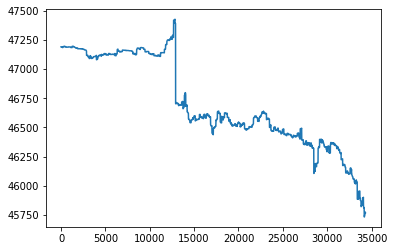

In [53]:
df.Price.plot()

# .Price.plot()

In [51]:
#Trend following
#If the crypto is rising by x% --> buy
# Exit when profit is either above x% or below x%



In [54]:
def strategy(entry,lookback,qty,symbol,thresh,open_position=False):
    while True:
        df = pd.read_sql(symbol, engine)
        lookbackperiod = df.iloc[-lookback:]
        cumret=(lookbackperiod.Price.pct_change()+1).cumprod()-1

        if not open_position:
            if cumret[cumret.last_valid_index()]>entry:
                order = client.create_order(symbol=symbol,side='BUY',type='MARKET',quantity=qty)
                print(order)
                open_position=True
                break
    if open_position:
        while True:
            df = pd.read_sql(symbol, engine)
            sincebuy = df.loc[df.Time > pd.to_datetime(order['transactTime'],units='ms')]

            if len(sincebuy)>1:
                sincebuyret=(sincebuy.Price.pct_change()+1).cumprod()-1
                last_entry=sincebuyret[sincebuyret.last_valid_index()]

                if last_entry > thresh or last_entry < (-1 * thresh):
                    order = client.create_order(symbol=symbol,side='SELL',type='MARKET',quantity=qty)
                    print(order)
                    break


In [57]:
strategy(0.0005,600,0.0001,symbol=symbol,thresh=0.0005)